In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn import utils
from sklearn import preprocessing


In [2]:
df = pd.read_csv('insurance.csv')


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [4]:
df = df.drop('children', axis = 1)

In [5]:
key_vars = ['age', 'bmi', 'charges']

In [7]:
dfmean = df.groupby('smoker').mean()
dfmean

,age,bmi,charges
smoker,,,
no,39.39,30.65,8434.27
yes,38.51,30.71,32050.23


In [8]:
x= df[key_vars]
y= df['smoker']

In [9]:
x.shape

(1338, 3)

In [10]:
y.shape

(1338,)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns, index = x.index)

print(np.mean(x_scaled, axis=0))
print(np.std(x_scaled, axis=0))

x_scaled.head()

age       -0.00
bmi       -0.00
charges   -0.00
dtype: float64
age       1.00
bmi       1.00
charges   1.00
dtype: float64


,age,bmi,charges
0,-1.44,-0.45,0.30
1,-1.51,0.51,-0.95
2,-0.80,0.38,-0.73
3,-0.44,-1.31,0.72
4,-0.51,-0.29,-0.78


In [12]:
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0)


In [14]:
clf1 = svm.SVC()
clf1.fit(x_train,y_train)
predictions1 = clf1.predict(x_test)
score1 = accuracy_score(y_test, predictions1)
print(score1)

0.9641791044776119


In [15]:
clf2 = tree.DecisionTreeClassifier(random_state=0)
clf2 = clf2.fit(x_train, y_train)
predictions2 = clf2.predict(x_test)
score2 = accuracy_score(y_test,predictions2)
print(score2)

0.9552238805970149


In [31]:
for i in range(20):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y)
    clf1 = svm.SVC()
    clf1.fit(x_train,y_train)
    predictions1 = clf1.predict(x_test)
    score1 = accuracy_score(y_test,predictions1)
    clf2 = tree.DecisionTreeClassifier(random_state=0)
    clf2 = clf2.fit(x_train, y_train)
    predictions2 = clf2.predict(x_test)
    score2 = accuracy_score(y_test,predictions2)
    print(score1,score2,score1-score2)

0.30149253731343284 0.31343283582089554 -0.011940298507462699
0.2835820895522388 0.3373134328358209 -0.05373134328358209
0.33432835820895523 0.34626865671641793 -0.011940298507462699
0.2955223880597015 0.30149253731343284 -0.005970149253731349
0.3194029850746269 0.3373134328358209 -0.017910447761193993
0.28955223880597014 0.34328358208955223 -0.05373134328358209
0.31343283582089554 0.31343283582089554 0.0
0.30149253731343284 0.29850746268656714 0.0029850746268657025
0.28955223880597014 0.3253731343283582 -0.03582089552238804
0.3074626865671642 0.31044776119402984 -0.002985074626865647
0.3044776119402985 0.3253731343283582 -0.020895522388059695
0.28955223880597014 0.3701492537313433 -0.08059701492537313
0.2955223880597015 0.34626865671641793 -0.05074626865671644
0.32238805970149254 0.33134328358208953 -0.008955223880596996
0.3164179104477612 0.33134328358208953 -0.014925373134328346
0.2746268656716418 0.3373134328358209 -0.06268656716417909
0.3164179104477612 0.37910447761194027 -0.0626

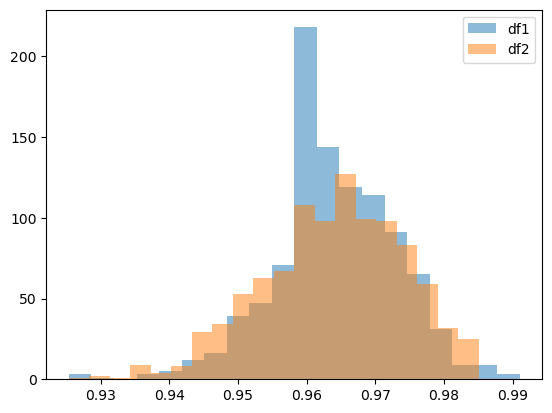

In [16]:
all_scores1=[]
all_scores2=[]
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y)
    clf1 = svm.SVC()
    clf1.fit(x_train,y_train)
    predictions1 = clf1.predict(x_test)
    score1 = accuracy_score(y_test,predictions1)
    clf2 = tree.DecisionTreeClassifier(random_state=0)
    clf2 = clf2.fit(x_train, y_train)
    predictions2 = clf2.predict(x_test)
    score2 = accuracy_score(y_test,predictions2)
    all_scores1.append(score1)
    all_scores2.append(score2)    
plt.hist(all_scores1, label="df1", alpha=0.5, bins=20)
plt.hist(all_scores2, label="df2", alpha=0.5, bins=20)
plt.legend()
plt.show()